# Pythonによる並行処理のパターン
+ https://qiita.com/kaitolucifer/items/e4ace07bd8e112388c75

#### Pythonでマルチタスクを同時に処理したい時は主に2通りのやり方
+ プライマリースレッドを持つプロセスを複数個立ち上げて, 複数のタスクを処理する
+ 1個のプロセスの中で複数スレッドを立ち上げて, 複数のタスクを処理する
+ 複数プロセスで複数スレッドを立ち上げて複数のタスクを処理もできるがモデルが複雑化するので非推奨

#### Pythonのスレッド
+ プロセスでシミュレートしたような疑似スレッドではなくOSのネイティブスレッドを使用する
+ Linux系ではPOSIXスレッド
+ WindowsではWindowsスレッド

2つのモジュールが用意されている  
+ _thread 低レベルモジュール
+ threading 高レベルモジュール

In [1]:
from type_hint import *
from import_str import importstr
from log_conf import logging
log = logging.getLogger('nb')

# log.setLevel(logging.WARN)
log.setLevel(logging.INFO)
log.setLevel(logging.DEBUG)

module_parent_dir /Users/inoueshinichi/Desktop/MyGithub/Learn_PythonConcurrent/..
module_parent_dir /Users/inoueshinichi/Desktop/MyGithub/Learn_PythonConcurrent/..
module_parent_dir /Users/inoueshinichi/Desktop/MyGithub/Learn_PythonConcurrent/..


ConcurrentPatternフォルダの各アプリクラスを実行する関数

In [2]:
# running everything app
def run(app, *argv):
    argv = list(argv)
    log.info('Running: {}({!r}).main()'.format(app, argv))
    print("*app.rsplit('.', 1) : ", *app.rsplit('.', 1))

    app_cls = importstr(*app.rsplit('.', 1)) # __import__を実行
    app_cls(argv).main()

    log.info("Finished: {}.({!r}).main()".format(app, argv))

#### 1-1. インスタンス化
t1とt2が交替で実行されていることが確認できます。交替ルールの1つはIO操作（ここではprint操作が該当する）

In [3]:
# run("concurrent_pattern.thread_app.SimpleThreadApp")

#### 1-2. カスタイマイズ
threading.Threadクラスを継承してrun()メソッドをオーバーライドして独自のカスタムスレッドを使用する

In [4]:
# run('concurrent_pattern.thread_app.ClassStyleThreadApp')

#### 1-3. スレッド数を計算
`active_count`でアクティブなスレッド数を数えることができる.

In [5]:
# run('concurrent_pattern.thread_app.CountingThreadApp')

#### 1-4. デーモンスレッド
+ デーモンスレッドという実態は存在しない. 
+ 通常のプライマリースレッドに対するワーカースレッドのことをデーモンスレッドと呼んでいるだけ
+ デーモンスレッドはプライマリースレッドの終了まで破棄が遅延される

In [6]:
run('concurrent_pattern.thread_app.DaemonThreadApp')

2023-06-21 23:26:35,504 INFO     pid:11263 nb:004:run Running: concurrent_pattern.thread_app.DaemonThreadApp([]).main()


*app.rsplit('.', 1) :  concurrent_pattern.thread_app DaemonThreadApp
module_parent_dir /Users/inoueshinichi/Desktop/MyGithub/Learn_PythonConcurrent/concurrent_pattern/..
module:  <module 'concurrent_pattern' from '/Users/inoueshinichi/Desktop/MyGithub/Learn_PythonConcurrent/concurrent_pattern/__init__.py'>
task: t1
task: t2
task: t3
33
3



2023-06-21 23:26:37,207 INFO     pid:11263 nb:010:run Finished: concurrent_pattern.thread_app.DaemonThreadApp.([]).main()


[primary-thread] スレッド数: 10


22
2

11
1



![1-5. GIL.jpeg](<attachment:1-5. GIL.jpeg>)
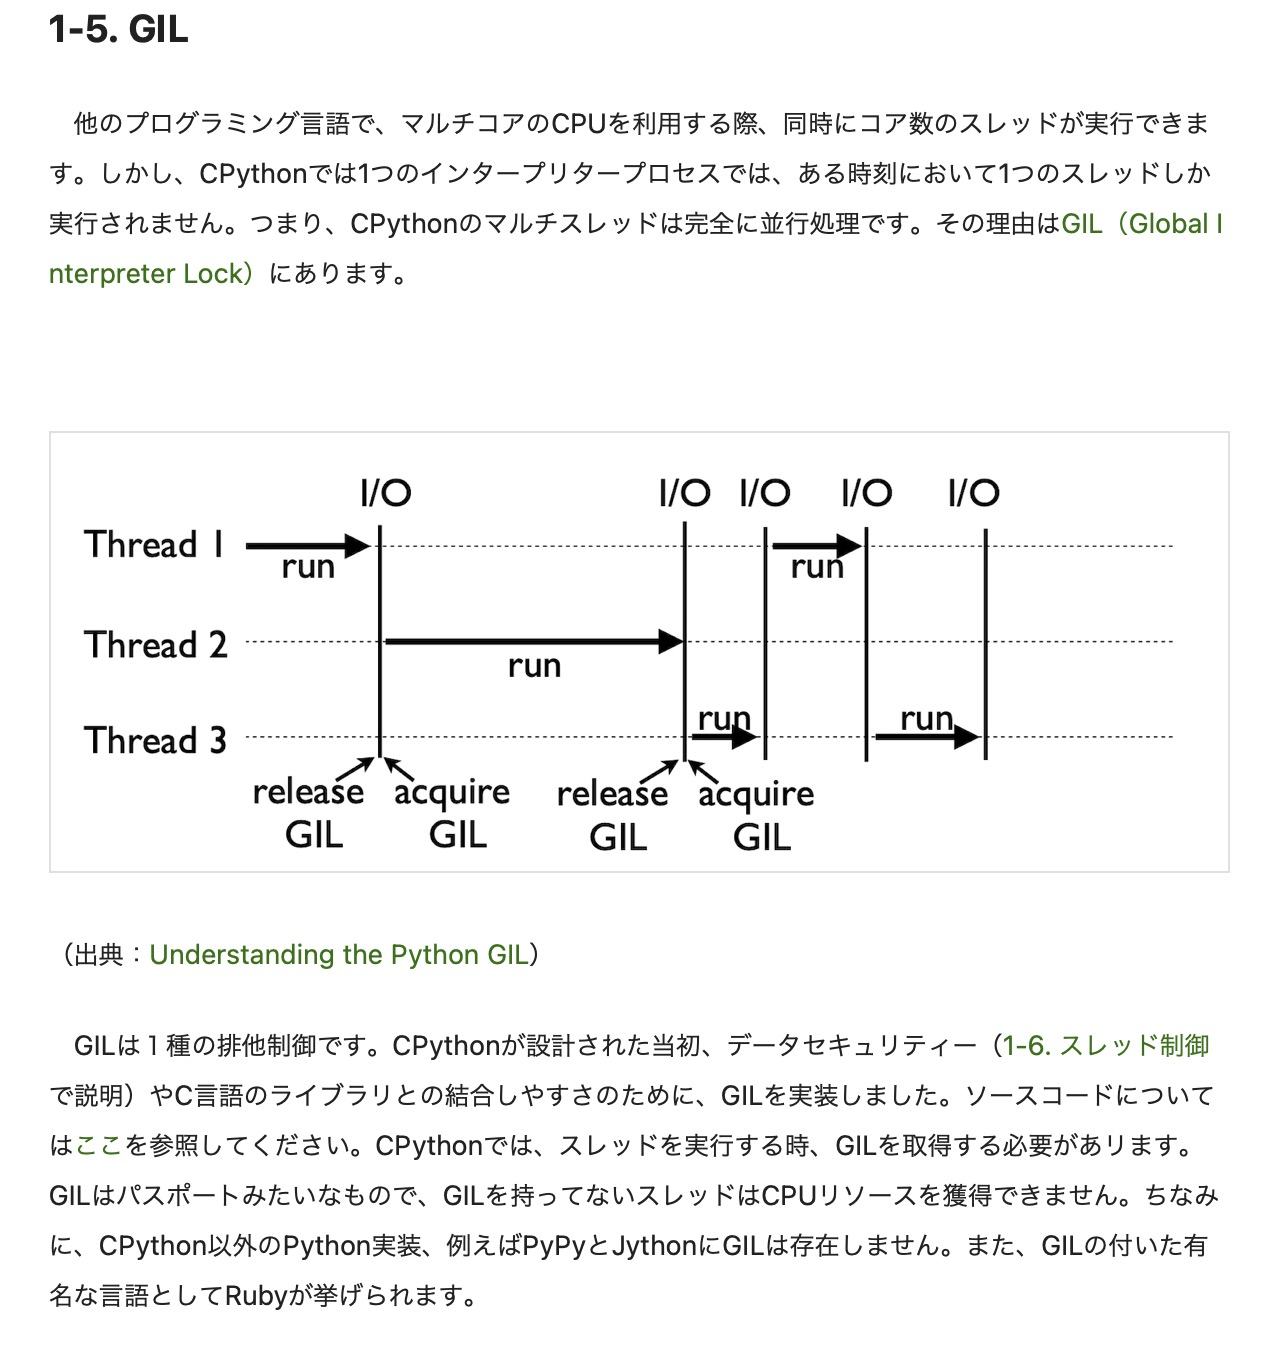

![threading とmultiprocessingによる並行処理パターン集.jpeg](<attachment:threading とmultiprocessingによる並行処理パターン集.jpeg>)
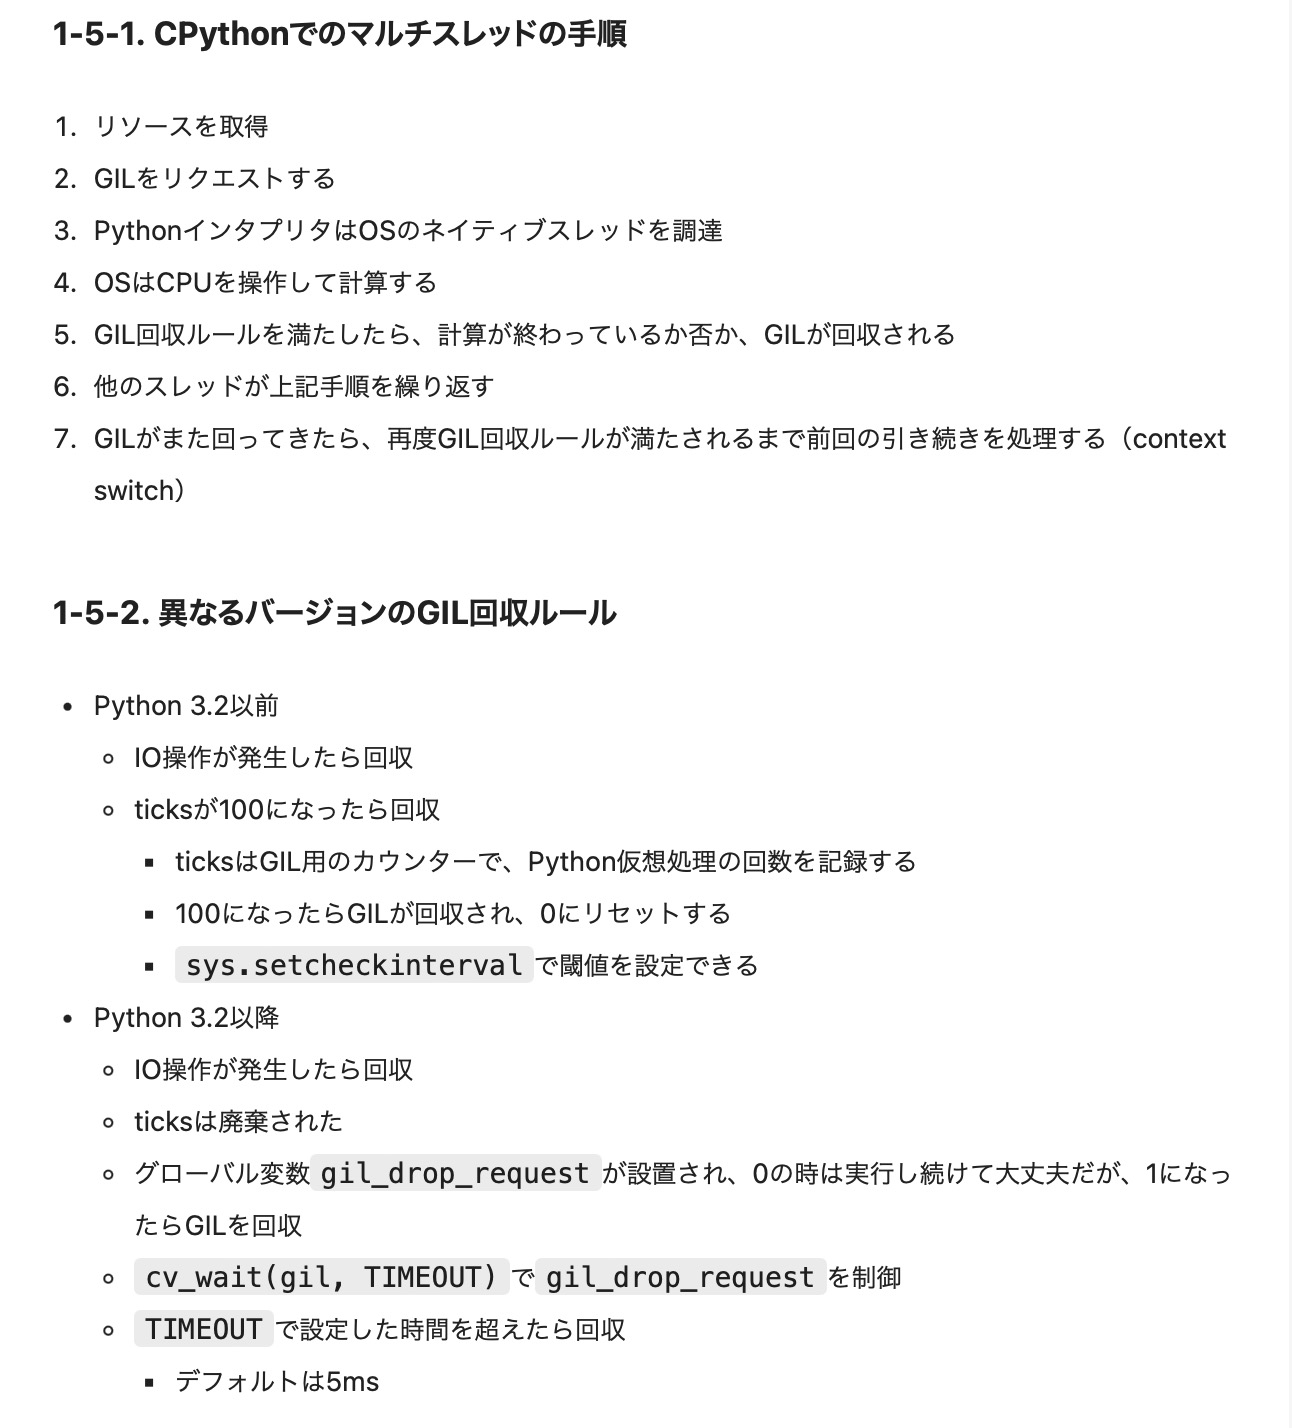